In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
# function for retrieving our data
def get_data(path):
    data = {} # create dictionary to store all our dataframes
    for filename in os.listdir(path): # loop over every file in the directory
        file_path = os.path.join(path, filename) # construct full file path
        data[filename[:-4]] = pd.read_csv(file_path, index_col=0) # read .csv file into pd DataFrame and add to dictionary, without the .csv extension in the key
    return data

In [3]:
# specify the path to our data
dir_path = 'data/'

data = get_data(dir_path)

In [4]:
data["circuits"].head()

,circuitRef,name,location,country,lat,lng,alt,url
circuitId,,,,,,,,
1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [5]:
data["constructor_results"].head()

,raceId,constructorId,points,status
constructorResultsId,,,,
1,18,1,14.0,\N
2,18,2,8.0,\N
3,18,3,9.0,\N
4,18,4,5.0,\N
5,18,5,2.0,\N


In [6]:
data["constructor_standings"].head()

,raceId,constructorId,points,position,positionText,wins
constructorStandingsId,,,,,,
1,18,1,14.0,1,1,1
2,18,2,8.0,3,3,0
3,18,3,9.0,2,2,0
4,18,4,5.0,4,4,0
5,18,5,2.0,5,5,0


In [7]:
data["constructors"].head()

,constructorRef,name,nationality,url
constructorId,,,,
1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [8]:
data["driver_standings"].head()

,raceId,driverId,points,position,positionText,wins
driverStandingsId,,,,,,
1,18,1,10.0,1,1,1
2,18,2,8.0,2,2,0
3,18,3,6.0,3,3,0
4,18,4,5.0,4,4,0
5,18,5,4.0,5,5,0


In [9]:
data["drivers"].head()

,driverRef,number,code,forename,surname,dob,nationality,url
driverId,,,,,,,,
1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [10]:
data["lap_times"].loc[1096]

,driverId,lap,position,time,milliseconds
raceId,,,,,
1096,830,1,1,1:32.198,92198
1096,830,2,1,1:30.541,90541
1096,830,3,1,1:29.968,89968
1096,830,4,1,1:30.368,90368
1096,830,5,1,1:30.502,90502
...,...,...,...,...,...
1096,822,53,16,1:32.998,92998
1096,822,54,16,1:32.995,92995
1096,822,55,16,1:31.236,91236


<function matplotlib.pyplot.show(close=None, block=None)>

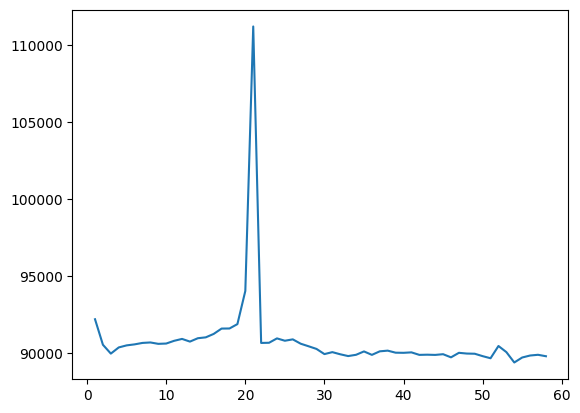

In [31]:
race1096 = data["lap_times"].loc[1096]
x_vals = race1096.loc[race1096.driverId == 830]["lap"].values
y_vals = race1096.loc[race1096.driverId == 830]["milliseconds"].values
plt.plot(x_vals,y_vals)
plt.show

In [12]:
data["pit_stops"].head()

,driverId,stop,lap,time,duration,milliseconds
raceId,,,,,,
841,153,1,1,17:05:23,26.898,26898
841,30,1,1,17:05:52,25.021,25021
841,17,1,11,17:20:48,23.426,23426
841,4,1,12,17:22:34,23.251,23251
841,13,1,13,17:24:10,23.842,23842


In [13]:
data["qualifying"].head()

,raceId,driverId,constructorId,number,position,q1,q2,q3
qualifyId,,,,,,,,
1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


In [14]:
data["results"].max()

raceId             1096
driverId            856
constructorId       214
number               \N
grid                 34
position             \N
positionText          W
positionOrder        39
points             50.0
laps                200
time                 \N
milliseconds         \N
fastestLap           \N
rank                 \N
fastestLapTime       \N
fastestLapSpeed      \N
statusId            141
dtype: object

In [15]:
data["seasons"].head()

,url
year,
2009,http://en.wikipedia.org/wiki/2009_Formula_One_...
2008,http://en.wikipedia.org/wiki/2008_Formula_One_...
2007,http://en.wikipedia.org/wiki/2007_Formula_One_...
2006,http://en.wikipedia.org/wiki/2006_Formula_One_...
2005,http://en.wikipedia.org/wiki/2005_Formula_One_...


In [16]:
data["sprint_results"].max()

raceId            1095
driverId           855
constructorId      214
number              99
grid                20
position            \N
positionText         R
positionOrder       20
points               8
laps                24
time                \N
milliseconds        \N
fastestLap          \N
fastestLapTime      \N
statusId           130
dtype: object

In [17]:
data["status"].head()

,status
statusId,
1,Finished
2,Disqualified
3,Accident
4,Collision
5,Engine


In [18]:
data["races"].loc[1096]

year                                                        2022
round                                                         22
circuitId                                                     24
name                                        Abu Dhabi Grand Prix
date                                                  2022-11-20
time                                                    13:00:00
url            http://en.wikipedia.org/wiki/2022_Abu_Dhabi_Gr...
fp1_date                                              2022-11-18
fp1_time                                                10:00:00
fp2_date                                              2022-11-18
fp2_time                                                13:00:00
fp3_date                                              2022-11-19
fp3_time                                                11:00:00
quali_date                                            2022-11-19
quali_time                                              14:00:00
sprint_date              

### Selection of year and corresponding Grand Prix

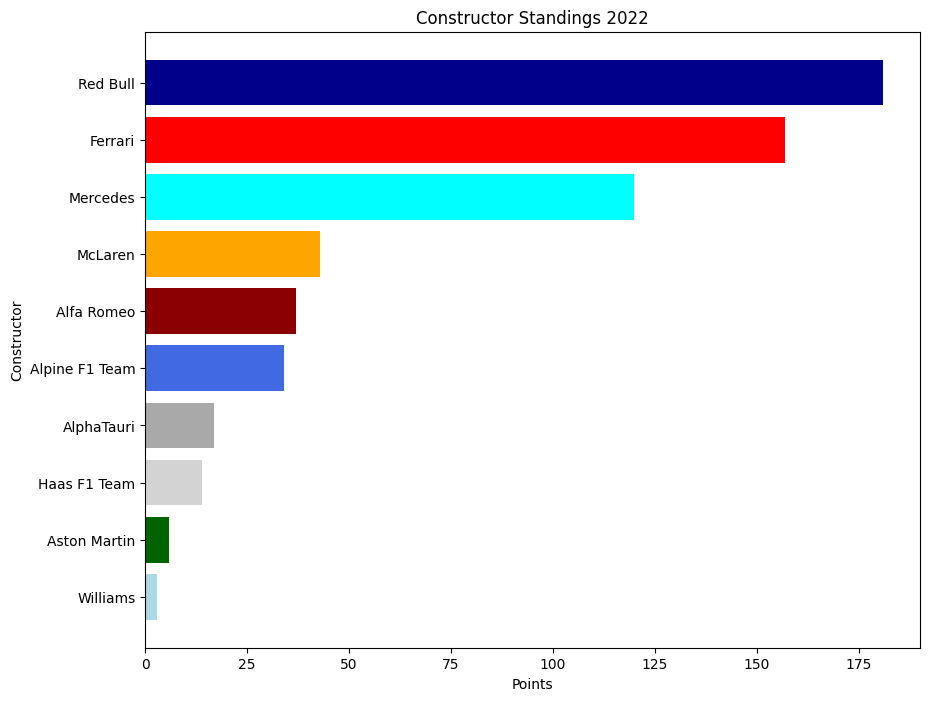

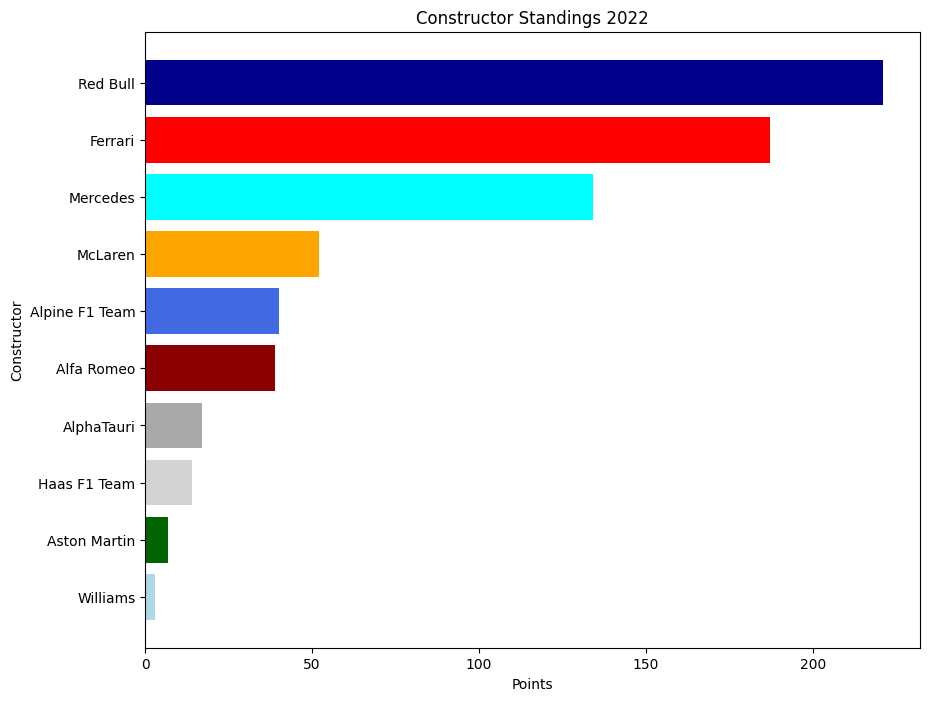

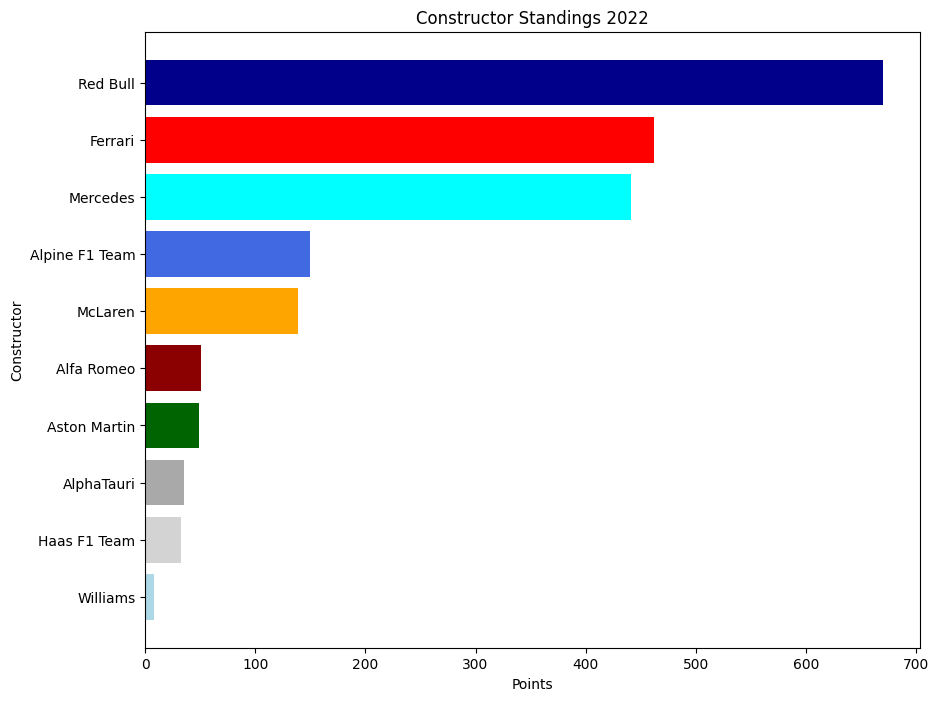

In [76]:
import pandas as pd
import tkinter as tk
import numpy as np
from tkinter import ttk
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Read the CSV files
races_df = pd.read_csv('data/races.csv') #raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
lap_times_df = pd.read_csv('data/lap_times.csv') #raceId,driverId,lap,position,time,milliseconds
drivers_df = pd.read_csv('data/drivers.csv') #driverId,driverRef,number,code,forename,surname,dob,nationality,url
driver_codes = drivers_df.set_index('driverId')['code'].to_dict()
results_df = pd.read_csv('data/results.csv') #resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
constructors_df = pd.read_csv('data/constructors.csv') #constructorId,constructorRef,name,nationality,url

# Define specific colors for constructors
constructor_colors = {
    'Red Bull': 'darkblue',
    'Mercedes': 'cyan',
    'Ferrari': 'red',
    'Alfa Romeo': 'darkred',
    'AlphaTauri': 'darkgrey',
    'Williams': 'lightblue',
    'McLaren': 'orange',
    'Aston Martin': 'darkgreen',
    'Alpine F1 Team': 'royalblue',
    'Haas F1 Team': 'lightgrey',
    'Renault': 'yellow',
    'Toro Rosso': 'darkgrey',
    'Force India': 'pink'
}

# Function to update the names based on the selected year
def update_names(event):
    selected_year = year_combobox.get()
    if selected_year.isdigit():
        names = races_df[races_df['year'] == int(selected_year)]['name']
        name_combobox['values'] = names.tolist()

# Function to get the raceId and plot the corresponding graph
def get_race_id_and_plot():
    selected_year = year_combobox.get()
    selected_name = name_combobox.get()
    selected_option = option_combobox.get()
    if selected_year.isdigit():
        race_id = races_df[(races_df['year'] == int(selected_year)) & (races_df['name'] == selected_name)]['raceId'].values[0]
        if selected_option == 'Global Racepace':
            plot_boxplot(race_id)
        elif selected_option == 'Lap-by-Lap Racepace':
            plot_lineplot(race_id)
        if selected_option == 'Position per Lap':
            plot_position_per_lap(race_id)
        if selected_option == 'Driver Standings':
            plot_drivers_standings(race_id)
        elif selected_option == 'Constructor Standings':
            plot_constructor_standings(race_id)

current_canvas = None

def plot_boxplot(race_id):
    global current_canvas
    race_data = lap_times_df[lap_times_df['raceId'] == race_id]
    race_data = race_data.query('lap > 2')
    
    # Compute the mean and standard deviation of milliseconds for the race
    mean_milliseconds = race_data['milliseconds'].mean()
    std_milliseconds = race_data['milliseconds'].std()

    # Exclude laps that are likely to be pit stops, based on a threshold of mean + 2 standard deviations
    threshold = mean_milliseconds + 2 * std_milliseconds
    race_data = race_data[race_data['milliseconds'] < threshold]

    # Create a mapping between driverId and constructorId for the specific raceId
    driver_constructor_mapping = results_df[results_df['raceId'] == race_id].set_index('driverId')['constructorId'].to_dict()
    # Create a mapping between constructorId and constructor name
    constructor_names = constructors_df.set_index('constructorId')['name'].to_dict()

    # Group by driverId and sort by the mean of the 'milliseconds' column
    sorted_drivers = race_data.groupby('driverId')['milliseconds'].mean().sort_values()
    sorted_driver_ids = sorted_drivers.index.tolist()

    # Get the data for each driver in the sorted order
    data_to_plot = [race_data[race_data['driverId'] == driver_id]['milliseconds'] / 1000 for driver_id in sorted_driver_ids]

    # Get the colors for each driver based on the constructor's team colors
    colors_to_plot = []
    for driver_id in sorted_driver_ids:
        constructor_id = driver_constructor_mapping.get(driver_id)
        constructor_name = constructor_names.get(constructor_id, 'Unknown')
        color = constructor_colors.get(constructor_name, 'black')
        colors_to_plot.append(color)
        
    # Get the driver codes for each driver in the sorted order
    labels_to_plot = [driver_codes.get(driver_id, f'Driver {driver_id}') for driver_id in sorted_driver_ids]

    fig, ax = plt.subplots(figsize=(15,6))
    bp = ax.boxplot(data_to_plot, patch_artist=True, showmeans=True, meanline=True)
    
    # Set the colors of the boxplots and style of median and mean lines
    for patch, color, meanline, medianline in zip(bp['boxes'], colors_to_plot, bp['means'], bp['medians']):
        patch.set_facecolor(color)
        meanline.set_linestyle('-')  # Solid line for mean
        meanline.set_color('black')
        medianline.set_linestyle('--')  # Dashed line for median
        medianline.set_color('black')
        
    ax.set_title('Global Racepace')
    ax.set_xlabel('Driver')
    ax.set_ylabel('Seconds')
    # Set the x-axis labels to the driver codes
    ax.set_xticklabels(labels_to_plot, ha='center')

    # Set the colors of the boxplots
    for patch, color in zip(bp['boxes'], colors_to_plot):
        patch.set_facecolor(color)

    # Remove the current canvas if it exists
    if current_canvas is not None:
        current_canvas.get_tk_widget().destroy()

    # Create a new canvas
    canvas = FigureCanvasTkAgg(fig, master=root)  # A tk.DrawingArea
    current_canvas = canvas
    canvas_widget = canvas.get_tk_widget()
    canvas_widget.pack()
    plt.tight_layout(rect=[0, 0, 1, 1])  # Adjusts the plot to make room for the legend

    canvas.draw()
    
# Function to plot the lap-by-lap racepace for the given raceId
def plot_lineplot(race_id):
    global current_canvas
    race_data = lap_times_df[lap_times_df['raceId'] == race_id]
    race_data = race_data.query('lap > 2')
    
    # Compute the mean and standard deviation of milliseconds for the race
    #mean_milliseconds = race_data['milliseconds'].mean()
    #std_milliseconds = race_data['milliseconds'].std()
    
    # Exclude laps that are likely to be pit stops, based on a threshold of mean + 2 standard deviations
    #threshold = mean_milliseconds + 1 * std_milliseconds
    #race_data = race_data[race_data['milliseconds'] < threshold]    

    # Create a mapping between driverId and constructorId for the specific raceId
    driver_constructor_mapping = results_df[results_df['raceId'] == race_id].set_index('driverId')['constructorId'].to_dict()

    # Create a mapping between constructorId and constructor name
    constructor_names = constructors_df.set_index('constructorId')['name'].to_dict()

    fig, ax = plt.subplots(figsize=(15,6))
    
    # Keep track of the drivers plotted for each constructor
    plotted_constructors = {}

    # Plot a line for each driver, using the constructor's specific color
    for driver_id in race_data['driverId'].unique():
        driver_data = race_data[race_data['driverId'] == driver_id]
        
        # Calculate the moving average for the milliseconds column
        window_size = 10  # You can adjust this value
        smoothed_milliseconds = driver_data['milliseconds'].rolling(window=window_size, center=True).median().dropna()
        valid_laps = driver_data['lap'].loc[smoothed_milliseconds.index]
        
        constructor_id = driver_constructor_mapping.get(driver_id)
        name_code = driver_codes.get(driver_id, f'Driver {driver_id}')
        constructor_name = constructor_names.get(constructor_id, 'Unknown')
        color = constructor_colors.get(constructor_name, 'black')

        # Set line style based on whether this is the first or second driver for the constructor
        linestyle = '-' if constructor_id not in plotted_constructors else '--'
        plotted_constructors[constructor_id] = True

        ax.plot(valid_laps, smoothed_milliseconds, label=f'{name_code}', color=color, linestyle=linestyle)

    # ... (rest of the code for labels, legend, etc.) ...
    ax.set_title('Lap Times Lineplot')
    ax.set_xlabel('Lap')
    ax.set_ylabel('Milliseconds')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

    # Remove the current canvas if it exists
    if current_canvas is not None:
        current_canvas.get_tk_widget().destroy()

    # Create a new canvas
    canvas = FigureCanvasTkAgg(fig, master=root)  # A tk.DrawingArea
    current_canvas = canvas
    canvas_widget = canvas.get_tk_widget()
    canvas_widget.pack()
    plt.tight_layout(rect=[0, 0, 1, 1])  # Adjusts the plot to make room for the legend
    canvas.draw()
    
def plot_position_per_lap(race_id):
    # Get race data
    race_data = lap_times_df[lap_times_df['raceId'] == race_id]

    # Create a mapping between driverId and constructorId for the specific raceId
    driver_constructor_mapping = results_df[results_df['raceId'] == race_id].set_index('driverId')['constructorId'].to_dict()

    # Create a mapping between constructorId and constructor name
    constructor_names = constructors_df.set_index('constructorId')['name'].to_dict()

    # Get the final positions of the drivers
    sorted_drivers = results_df[results_df['raceId'] == race_id].sort_values(by='positionOrder')['driverId']

    # Create a mapping between driverId and driver code
    driver_codes = drivers_df.set_index('driverId')['code'].to_dict()

    fig, ax = plt.subplots(figsize=(15,6))

    # Plot a line for each driver in the sorted order
    for driver_id in sorted_drivers:
        driver_data = race_data[race_data['driverId'] == driver_id]
        constructor_id = driver_constructor_mapping.get(driver_id)
        constructor_name = constructor_names.get(constructor_id, 'Unknown')
        color = constructor_colors.get(constructor_name, 'black')
        driver_code = driver_codes.get(driver_id, 'Unknown')
        
        ax.plot(driver_data['lap'], driver_data['position'], marker='o', color=color, linestyle='-')
        
        # Get the x and y coordinates for the last point
        x_last_point = driver_data['lap'].iloc[-1]
        y_last_point = driver_data['position'].iloc[-1]
        
        # Set an offset to move the text closer to the last point and slightly higher
        x_offset = 0.05  # Adjust this value to move the text horizontally
        y_offset = -0.3  # Adjust this value to move the text vertically

        # Add the driver code at the end of the line with the specified offsets
        ax.text(x_last_point + x_offset, y_last_point + y_offset, driver_code, color=color, verticalalignment='center')


    ax.set_title('Position per Lap')
    ax.set_xlabel('Lap')
    ax.set_ylabel('Position')
    ax.set_ylim(ax.get_ylim()[::-1]) # Reverse y-axis to make position 1 at the top

    # Add integers for the finishing positions on both sides
    finishing_positions = sorted(results_df[results_df['raceId'] == race_id]['positionOrder'].unique())
    ax.set_yticks(finishing_positions)
    ax.yaxis.set_tick_params(labelright=True)
    
    # Remove the current canvas if it exists
    if current_canvas is not None:
        current_canvas.get_tk_widget().destroy()

    # Create a new canvas
    canvas = FigureCanvasTkAgg(fig, master=root)  # A tk.DrawingArea
    canvas_widget = canvas.get_tk_widget()
    canvas_widget.pack()
    plt.tight_layout()
    canvas.draw()
    
def plot_drivers_standings(race_id):
    global current_canvas
    # Get the season based on race_id
    season = races_df[races_df['raceId'] == race_id]['year'].iloc[0]

    # Filter races up to the given race_id for the specific season
    standings_df = results_df[(results_df['raceId'] <= race_id) & (results_df['raceId'].isin(races_df[races_df['year'] == season]['raceId']))]

    # Group by driverId and sum the points
    driver_points = standings_df.groupby('driverId')['points'].sum().reset_index()

    # Merge with driver information
    driver_points = pd.merge(driver_points, drivers_df, on='driverId')

    # Sort by points
    driver_points = driver_points.sort_values('points', ascending=False)

    # Get the colors for the plot
    def get_team_color(driver_id):
        constructor_id = standings_df[standings_df['driverId'] == driver_id]['constructorId'].iloc[-1]
        constructor_name = constructors_df[constructors_df['constructorId'] == constructor_id]['name'].iloc[0]
        return constructor_colors.get(constructor_name, 'black')

    driver_points['color'] = driver_points['driverId'].apply(get_team_color)

    fig, ax = plt.subplots(figsize=(10,8))
    ax.barh(driver_points['code'], driver_points['points'], color=driver_points['color'])
    ax.invert_yaxis()
    ax.set_xlabel('Points')
    ax.set_ylabel('Driver')
    ax.set_title(f'Driver Standings {season}')

    if current_canvas is not None:
        current_canvas.get_tk_widget().destroy()

    canvas = FigureCanvasTkAgg(fig, master=root)
    current_canvas = canvas
    canvas_widget = canvas.get_tk_widget()
    canvas_widget.pack()
    canvas.draw()

def plot_constructor_standings(race_id):
    global current_canvas
    # Get the season based on race_id
    season = races_df[races_df['raceId'] == race_id]['year'].iloc[0]

    # Filter races up to the given race_id for the specific season
    standings_df = results_df[(results_df['raceId'] <= race_id) & (results_df['raceId'].isin(races_df[races_df['year'] == season]['raceId']))]

    # Group by driverId and sum the points
    driver_points = standings_df.groupby('driverId')['points'].sum().reset_index()

    # Merge with the standings_df to get the right constructorId
    driver_points = pd.merge(driver_points, standings_df[['driverId', 'constructorId']].drop_duplicates(), on='driverId')

    # Group by constructorId and sum the points again
    constructor_points = driver_points.groupby('constructorId')['points'].sum().reset_index()

    # Retrieve constructor name and color
    constructor_points['name'] = constructor_points['constructorId'].apply(lambda x: constructors_df[constructors_df['constructorId'] == x]['name'].iloc[0])
    constructor_points['color'] = constructor_points['name'].apply(lambda x: constructor_colors.get(x, 'black'))

    # Sort by points
    constructor_points = constructor_points.sort_values('points', ascending=False)

    fig, ax = plt.subplots(figsize=(10,8))
    ax.barh(constructor_points['name'], constructor_points['points'], color=constructor_points['color'])
    ax.invert_yaxis()
    ax.set_xlabel('Points')
    ax.set_ylabel('Constructor')
    ax.set_title(f'Constructor Standings {season}')

    if current_canvas is not None:
        current_canvas.get_tk_widget().destroy()

    canvas = FigureCanvasTkAgg(fig, master=root)
    current_canvas = canvas
    canvas_widget = canvas.get_tk_widget()
    canvas_widget.pack()
    canvas.draw()

# Create the main window
root = tk.Tk()
root.title("Select Year and Name")

# Create a combobox for selecting the year
year_combobox = ttk.Combobox(root, values=sorted(races_df['year'].unique()))
year_combobox.pack()

# Bind the update_names function to the selection event of the year_combobox
year_combobox.bind('<<ComboboxSelected>>', update_names)

# Create a combobox for displaying the names corresponding to the selected year
name_combobox = ttk.Combobox(root)
name_combobox.pack()

# Create a combobox for selecting the option
options = ['Global Racepace', 'Lap-by-Lap Racepace', 'Position per Lap', 'Driver Standings', 'Constructor Standings']
option_combobox = ttk.Combobox(root, values=options)
option_combobox.pack()

# Button to get the raceId and plot the graph based on the selected year, name, and option
get_race_id_button = tk.Button(root, text="Plot", command=get_race_id_and_plot)
get_race_id_button.pack()

# Label to display the raceId
race_id_label = tk.Label(root, text="")
race_id_label.pack()

# Run the Tkinter event loop
root.mainloop()